In [33]:
from frechetdist import frdist
import icua_analysis as ia
from itertools import combinations_with_replacement as combinations, islice
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_sliding_windows(array, N, M):
    """
    Create sliding windows over a 2D NumPy array.

    Parameters:
    - array: 2D NumPy array of points
    - N: Size of the sliding window
    - M: Step size

    Returns:
    - windows: NumPy array containing sliding windows
    """
    # Calculate the number of windows and the window starting indices
    num_windows = (len(array) - N) // M + 1
    start_indices = np.arange(0, num_windows * M, M)

    # Use NumPy slicing to create sliding windows
    windows = np.array([array[i:i+N] for i in start_indices])

    return windows


eye_data = {}
for par, trial_data in islice(ia.load_tabularised().has_eyetracking().groupby_participant(), 1, 2):
    eye_data.update({par + trial:data['eyetracking_data'][['x', 'y']].to_numpy() for trial, data in trial_data.items()})
        
wd1 = create_sliding_windows(eye_data['P02icuA'][:1000], 40, 4)
wd1 = wd1.transpose(0,2,1)
wd2 = create_sliding_windows(eye_data['P02icuaA'][:1000], 40, 4)
wd2 = wd2.transpose(0,2,1)




result = np.zeros((len(wd1), len(wd1)))

for i in range(len(wd1)):
    for j in range(len(wd2)):
        result[i,j] = frdist(wd1[i], wd1[j])
        #result[i,j] = (abs(wd1[i] - wd2[j])).sum()

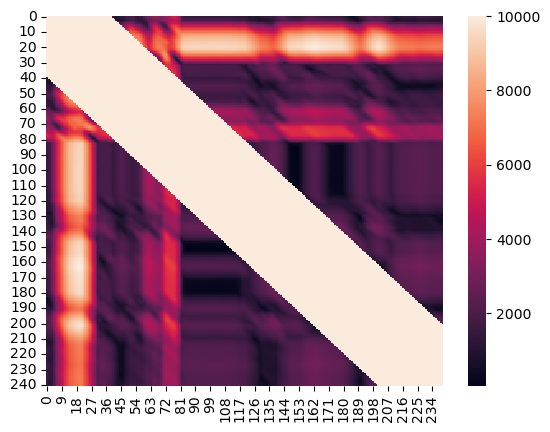

In [38]:
import seaborn as sns
for i in range(len(result)):
    result[i-20:i+20,i-20:i+20] = result.max()
sns.heatmap(result)

max_rows, max_cols = np.unravel_index(np.argsort(result.ravel()), result.shape)


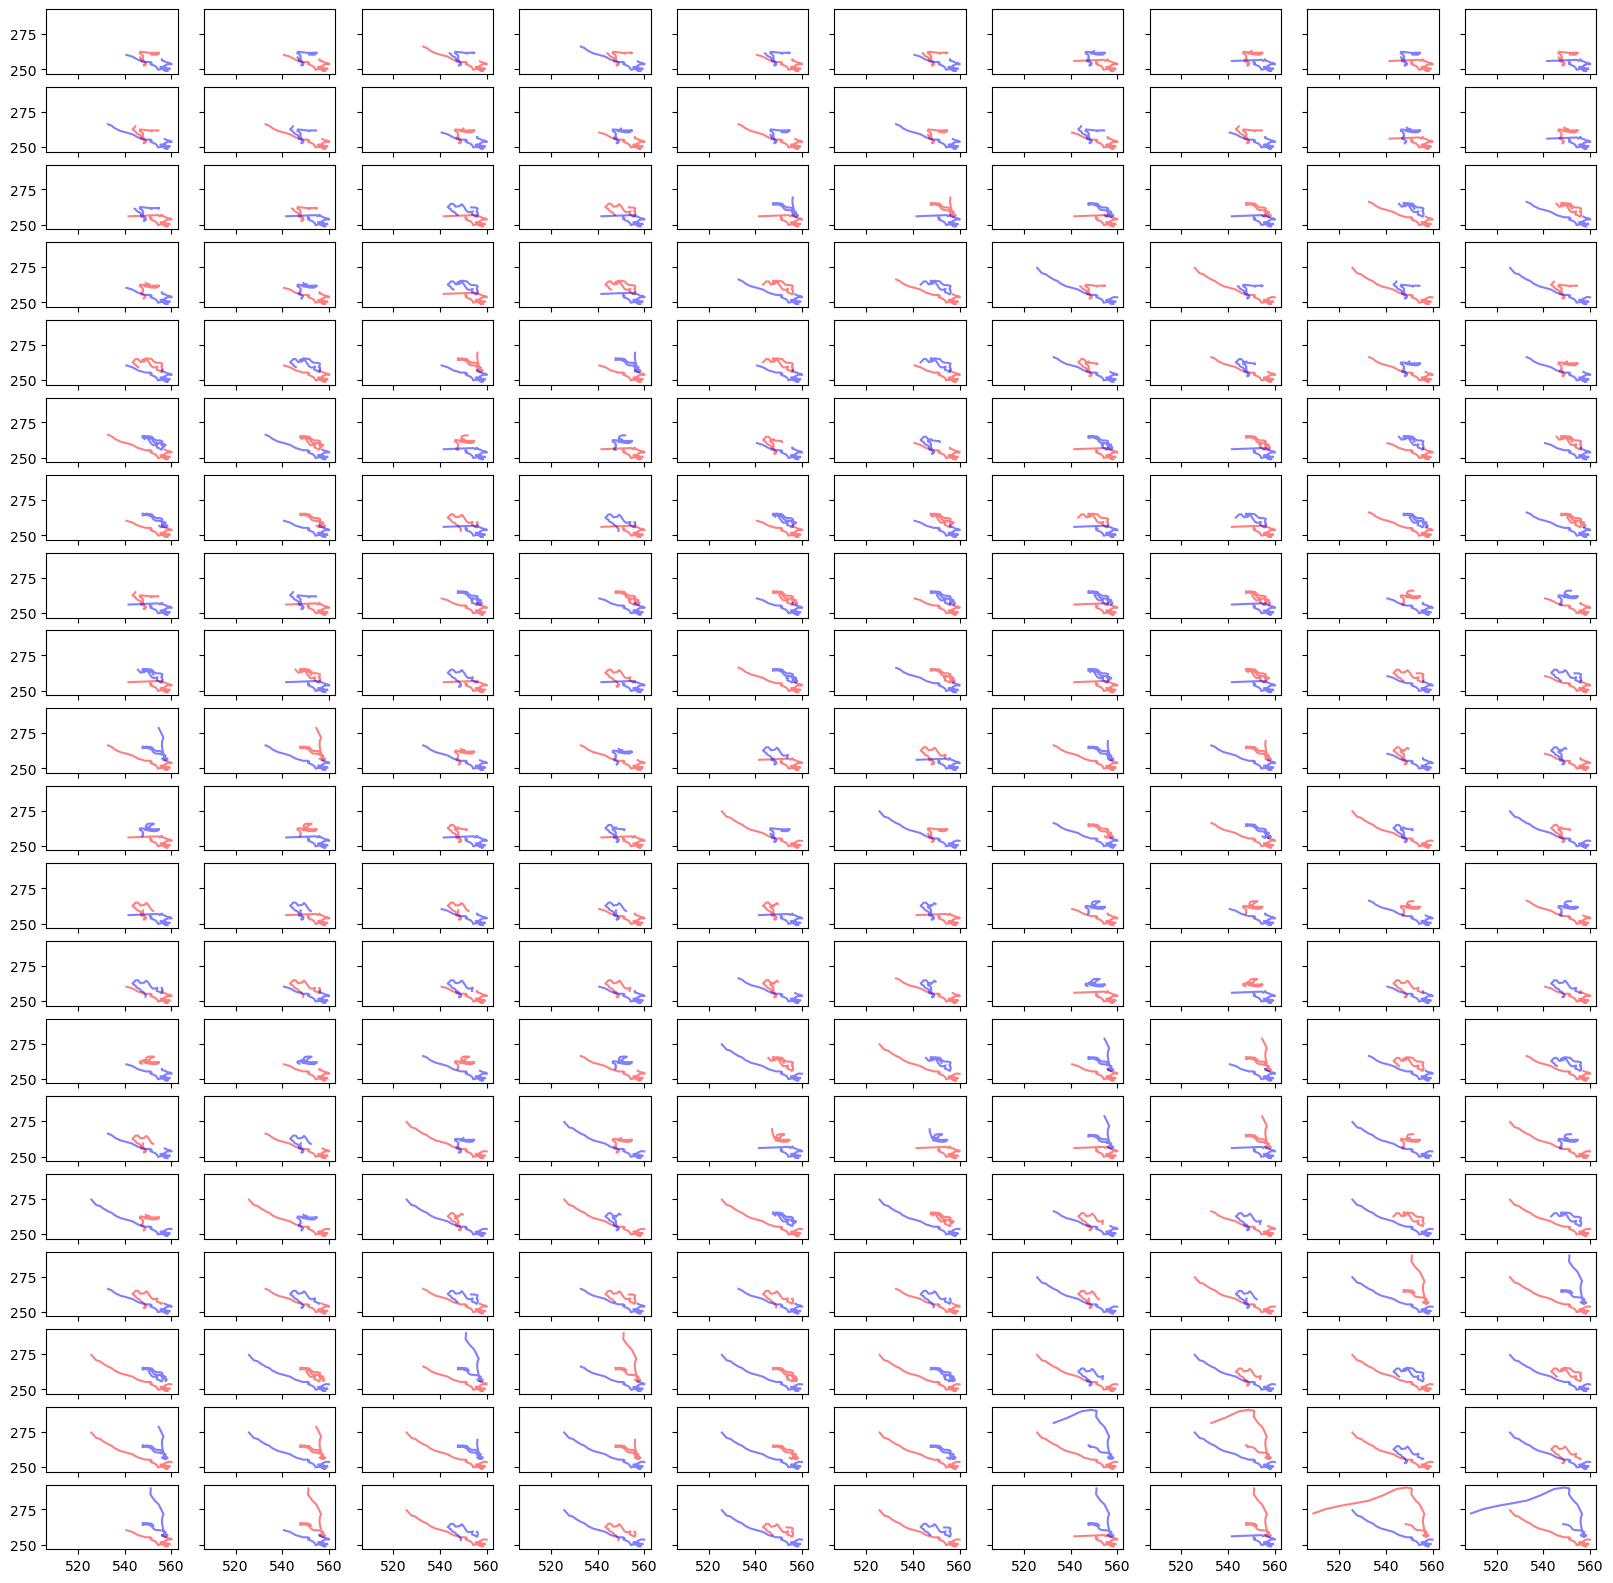

In [39]:
m = 10
n = 20
fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(20,20), sharex=True, sharey=True)
axes = axes.ravel()
for i in range(n * m):
    #print(result[max_rows[i], max_cols[i]])
    axes[i].plot(*wd1[max_rows[i].item()], color="red", alpha=0.5)
    axes[i].plot(*wd1[max_cols[i].item()], color="blue", alpha=0.5)
    
plt.show()

(953, 2, 50)


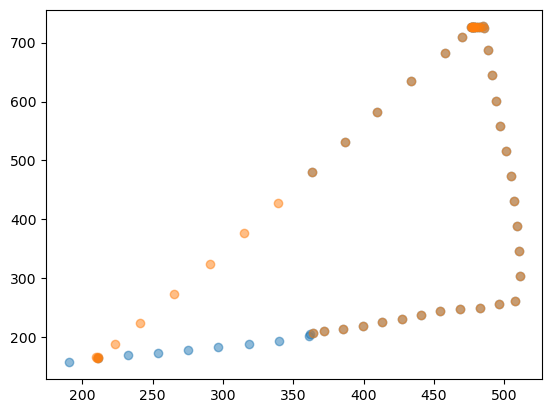

In [63]:
print(wd.shape)


for xy in wd[:2]:
    plt.scatter(*xy, alpha=0.5)

P02
P04


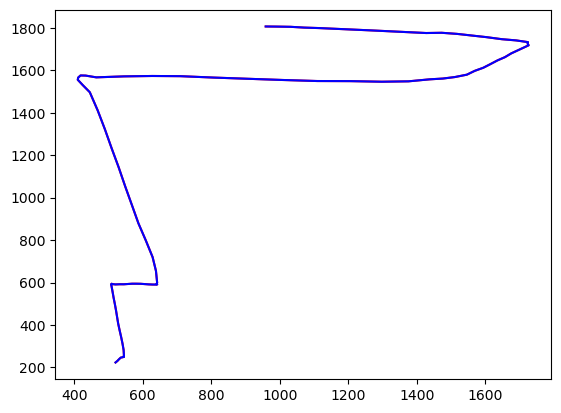

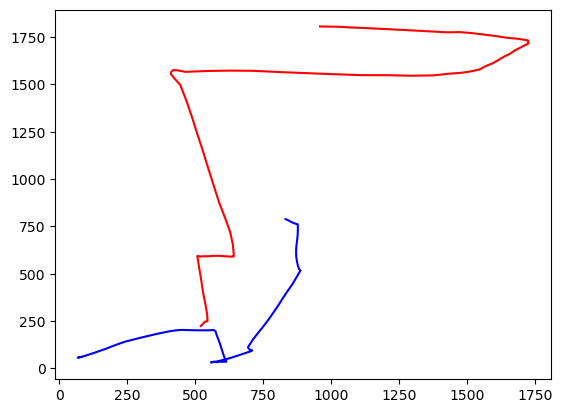

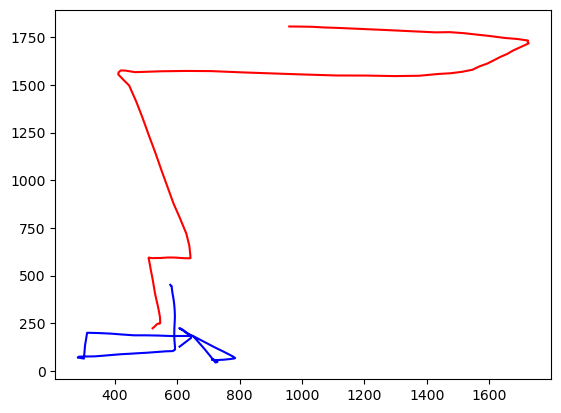

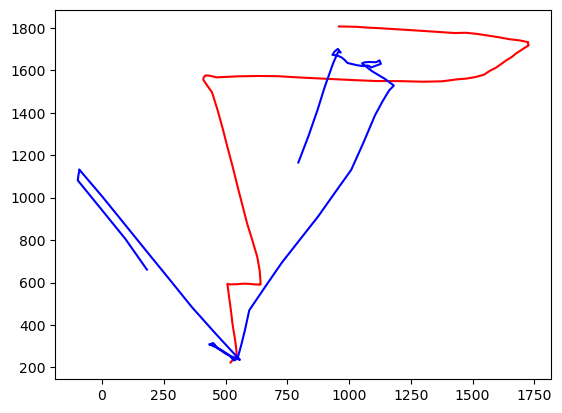

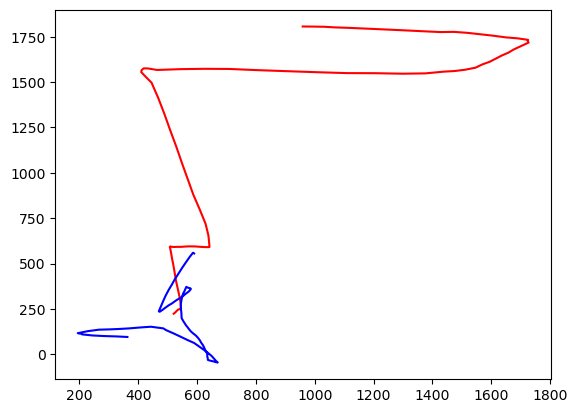

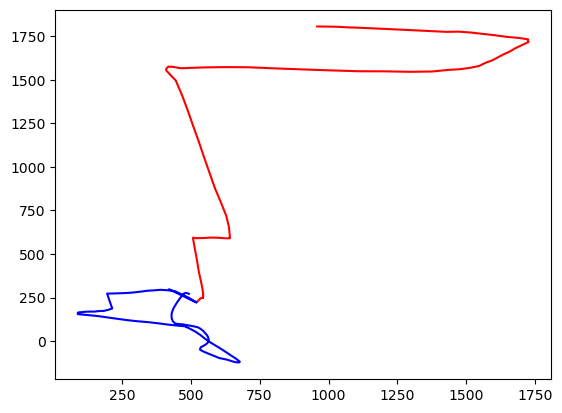

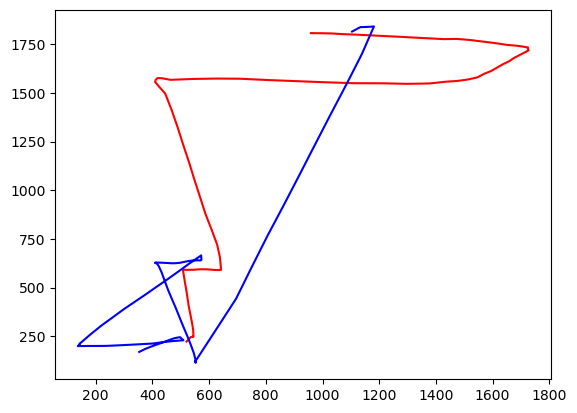

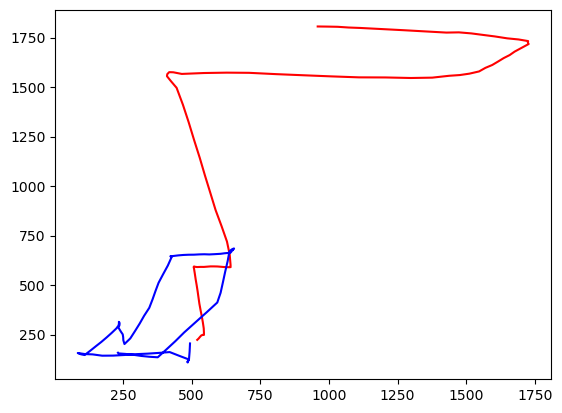

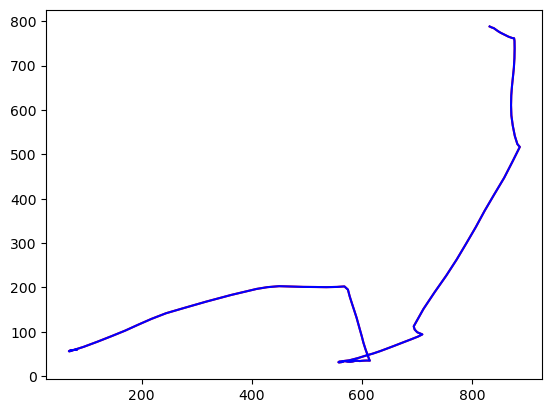

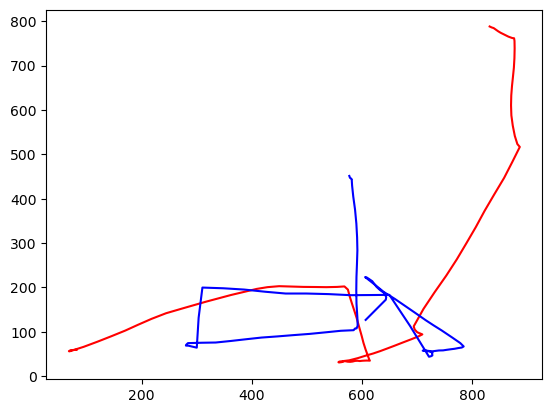

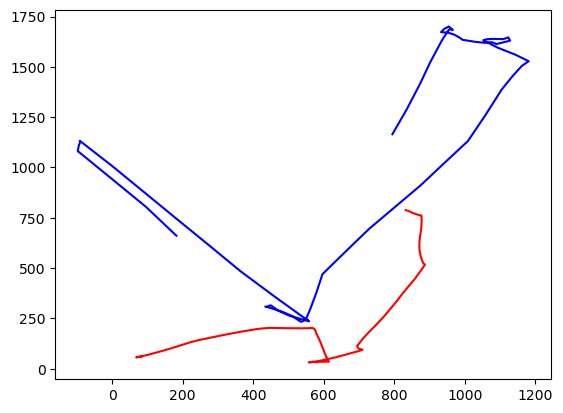

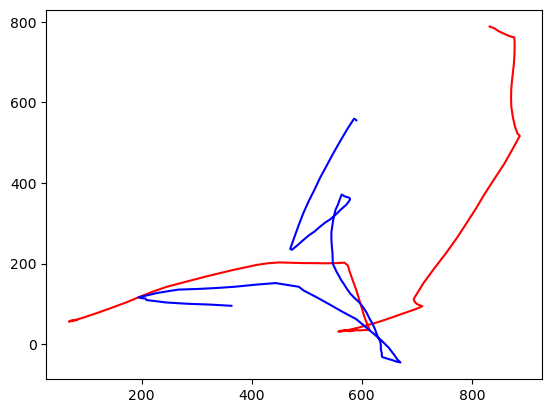

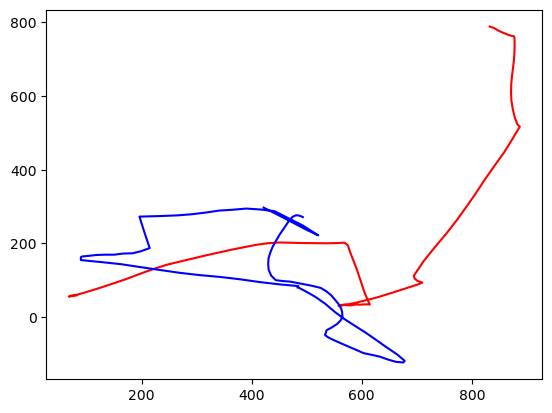

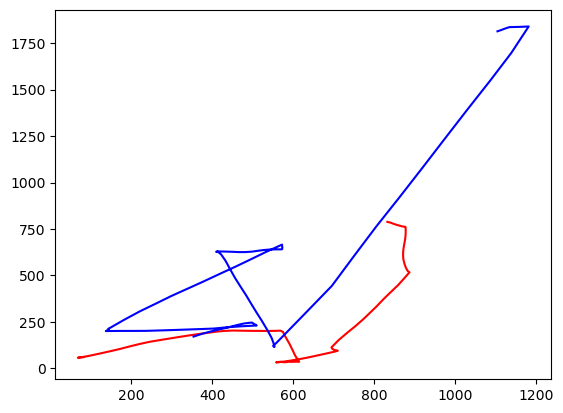

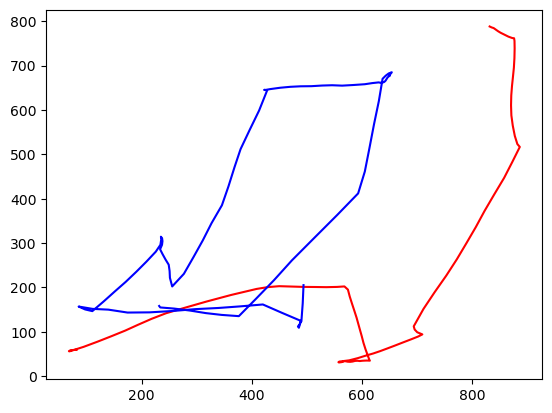

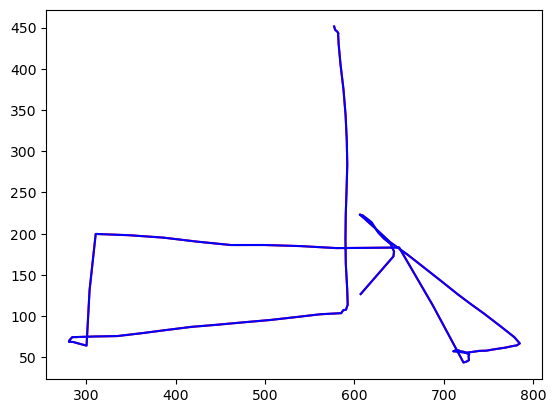

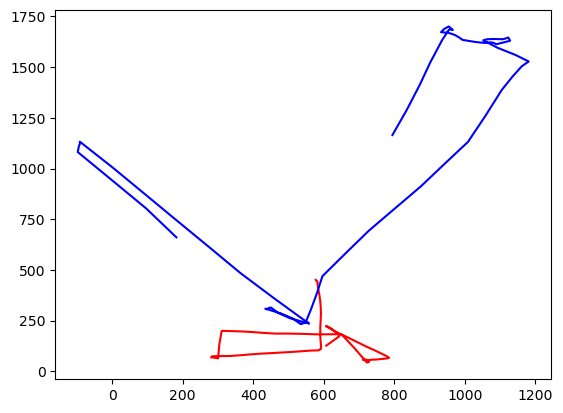

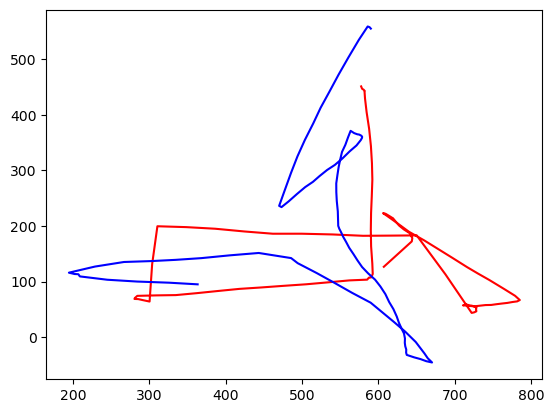

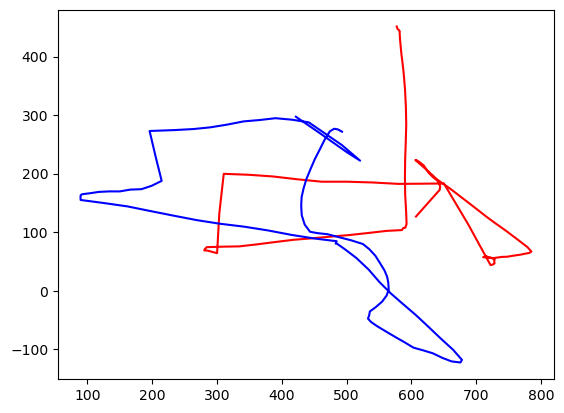

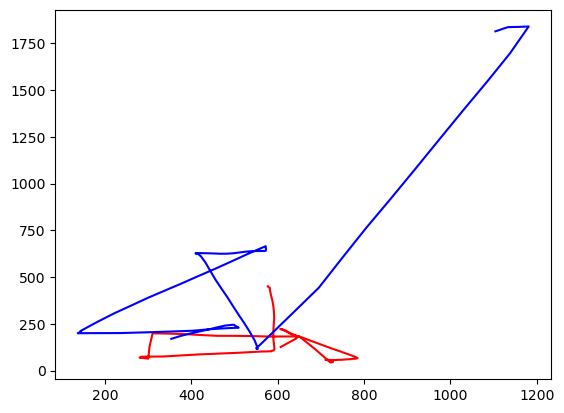

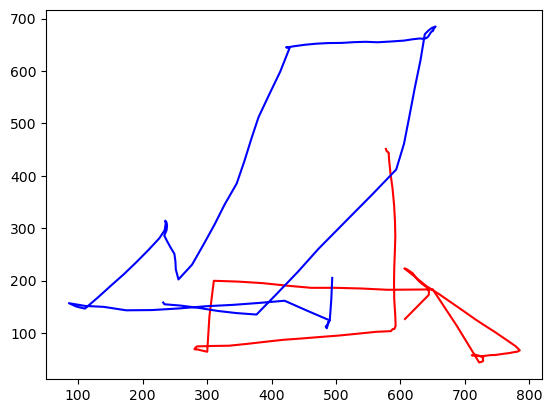

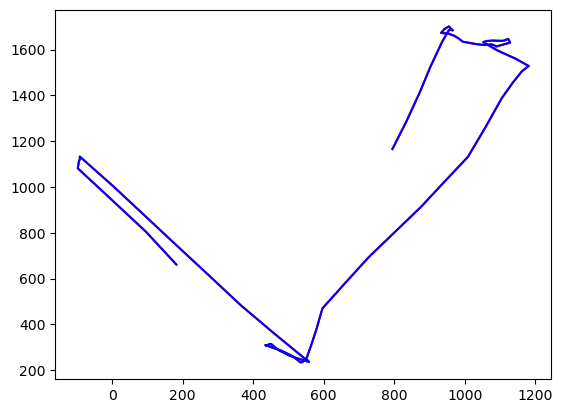

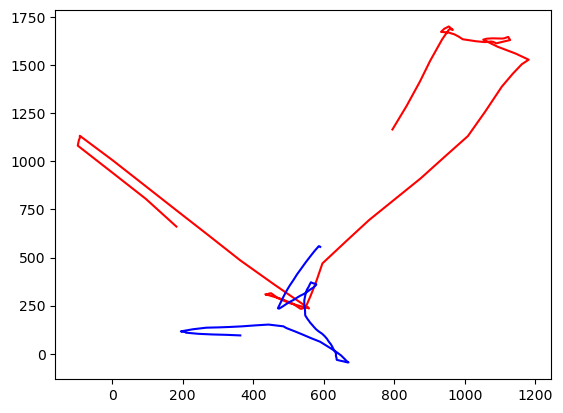

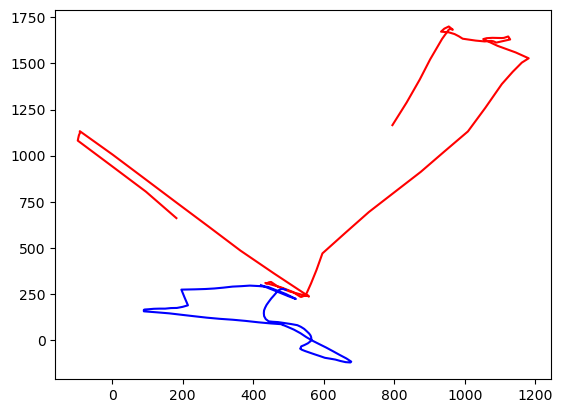

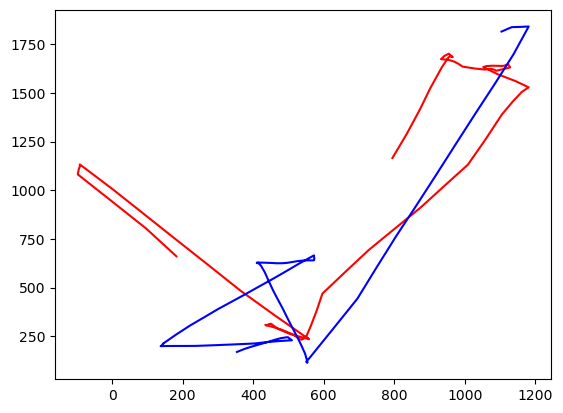

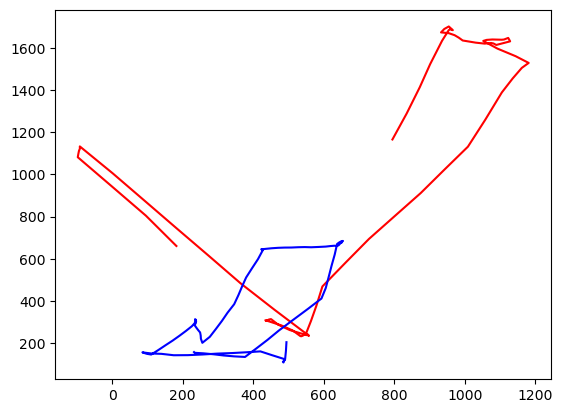

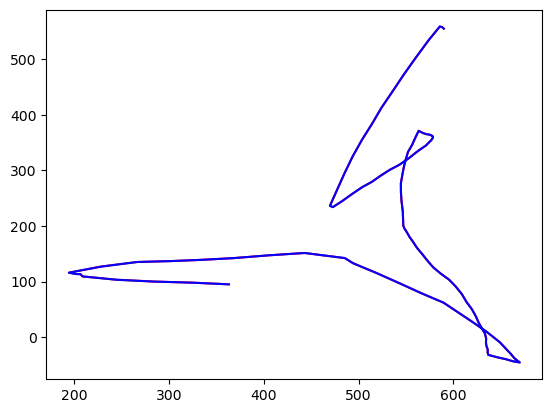

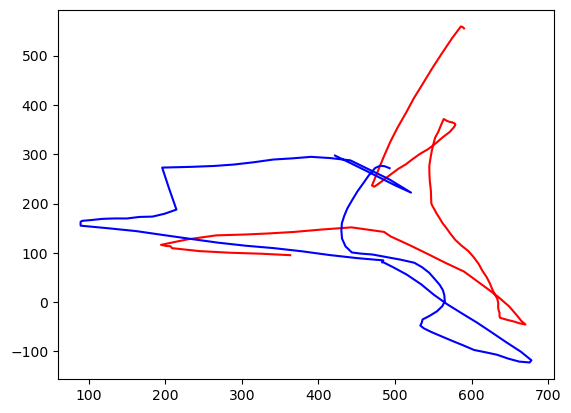

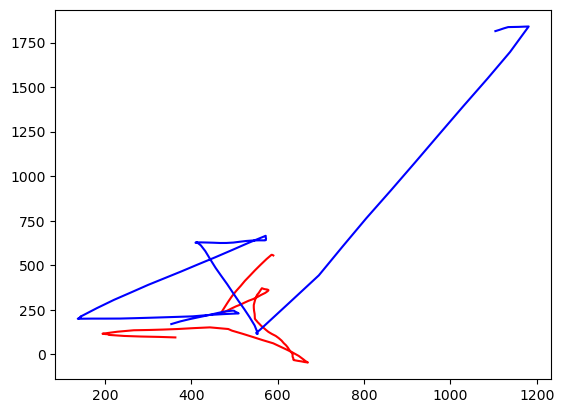

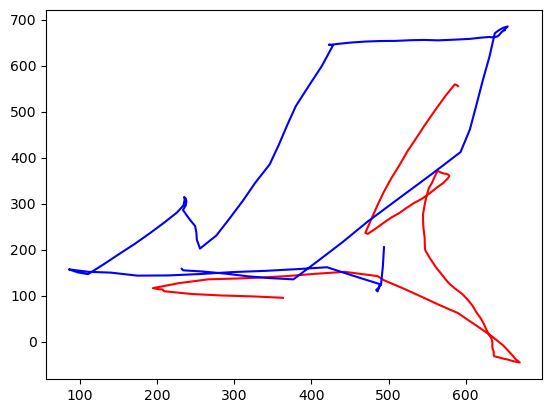

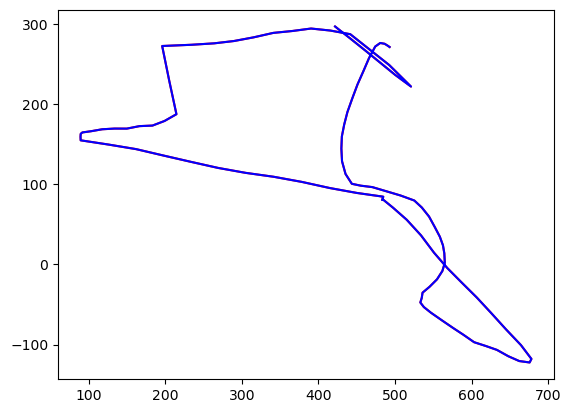

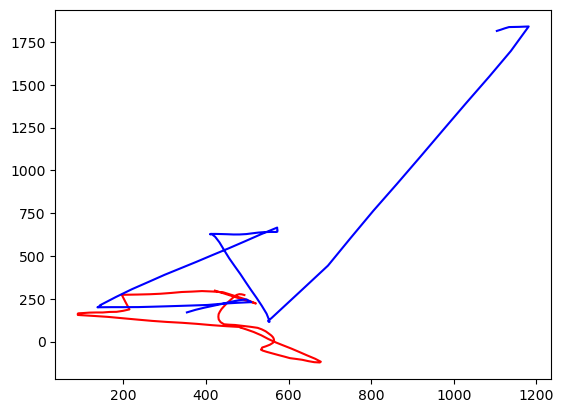

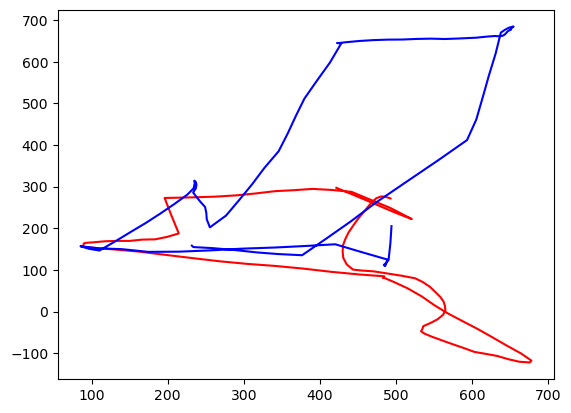

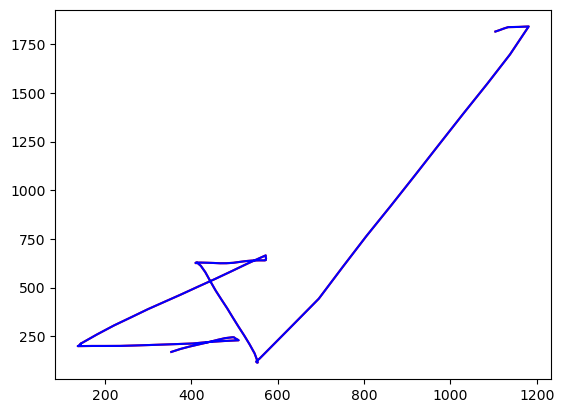

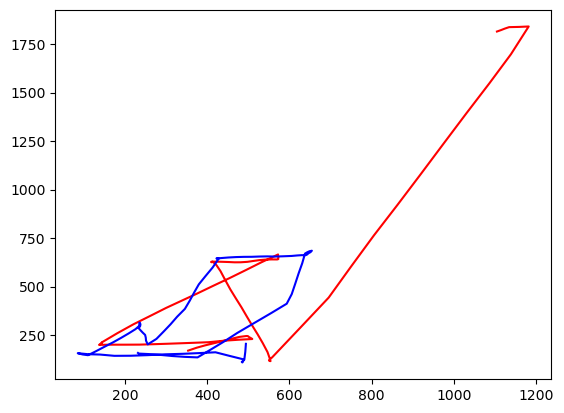

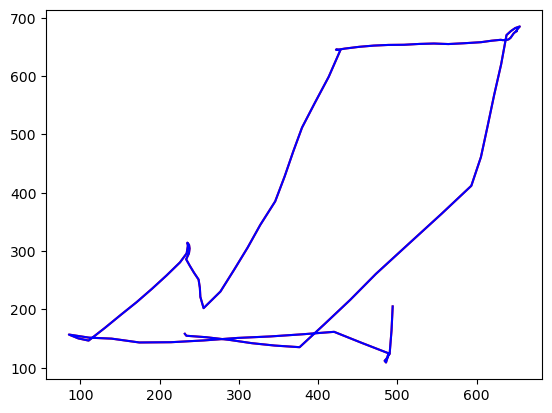

trial2    P02icuA      P02icuB     P02icuaA     P02icuaB      P04icuA  \
trial1                                                                  
P02icuA       0.0  1720.144439  1289.342199   725.213359  1634.644237   
P02icuB       NaN     0.000000          NaN  1313.948295   412.703931   
P02icuaA      NaN   543.794840     0.000000   986.519282   353.107739   
P02icuaB      NaN          NaN          NaN     0.000000  1212.903341   
P04icuA       NaN          NaN          NaN          NaN     0.000000   
P04icuB       NaN          NaN          NaN          NaN          NaN   
P04icuaA      NaN          NaN          NaN          NaN          NaN   
P04icuaB      NaN          NaN          NaN          NaN          NaN   

trial2        P04icuB     P04icuaA     P04icuaB  
trial1                                           
P02icuA    642.231482  1911.195872  1866.654347  
P02icuB   1514.719778   306.576048   501.730483  
P02icuaA  1108.589286   622.458455   675.272444  
P02icuaB   719.0520

In [29]:
from frechetdist import frdist
import icua_analysis as ia
from itertools import combinations_with_replacement as combinations, islice
import pandas as pd
import matplotlib.pyplot as plt


eye_data = {}
for par, trial_data in islice(ia.load_tabularised().has_eyetracking().groupby_participant(), 1, 3):
    print(par)
    eye_data.update({par + trial:data['eyetracking_data'][['x', 'y']].to_numpy() for trial, data in trial_data.items()})
    
    
df = pd.DataFrame(columns=["trial1", "trial2", "frdist"])




for (t1, xy1), (t2, xy2) in combinations(list(eye_data.items()), 2):
    u = min(len(xy1), len(xy2))
    df.loc[len(df)] = [t1, t2, frdist(xy1[:100], xy2[:100])]

    plt.figure()
    plt.plot(*xy1[:100].T, color="red")
    plt.plot(*xy2[:100].T, color="blue")
    plt.show()
    
df = df.pivot(index='trial1', columns='trial2', values='frdist')
print(df)    
        
        
    

        